## Part 1: Kernelized Linear Regression

Original X shape: (200, 1)
Manual polynomial features shape: (200, 5)
Polynomial Regression Equation:
y = 9.92 * x^5 + 0.19 * x^4 + -99.17 * x^3 + -0.55 * x^2 + 39.03 * x + -0.35


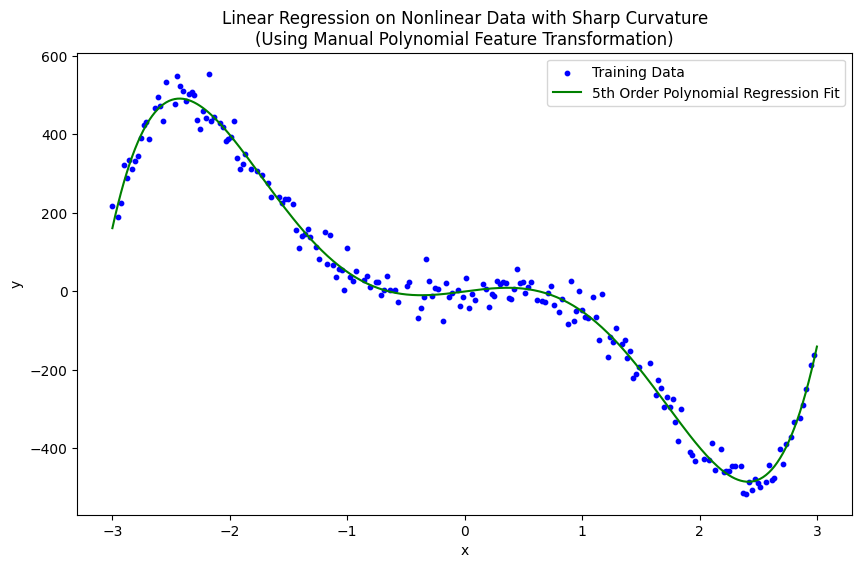

MSE error on training data: 900.1669517815666
MSE error on test data: 985.409287326647


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Generate Nonlinear Training Data using a 5th order polynomial with sharp curvature
#    Here, we use: y = 10*x^5 - 100*x^3 + 40*x, which has two minima and two maxima with sharp transitions.
# -----------------------------
np.random.seed(42)

# Generate 250 evenly spaced points between -3 and 3 for a smooth curve and shuffle them
X_all = np.linspace(-3, 3, 250).reshape(-1, 1)
X_all_shuffle = np.linspace(-3, 3, 250).reshape(-1, 1)
np.random.shuffle(X_all_shuffle)

# Split into 200 training points and 50 validation points
X_train = X_all_shuffle[:200]
y_train = 10 * X_train**5 - 100 * X_train**3 + 40 * X_train + np.random.randn(200, 1) * 30

X_val = X_all_shuffle[200:]
y_val = 10 * X_val**5 - 100 * X_val**3 + 40 * X_val + np.random.randn(50, 1) * 30

# -----------------------------
# 2. TO DO: Linear Regression with Manually Created Polynomial Features (degree 5)
# -----------------------------

degree = 5
# Manually create polynomial features: [x, x^2, x^3, x^4, x^5]
X_poly_manual = np.hstack([X_train**i for i in range(1, degree+1)])
print("Original X shape:", X_train.shape)
print("Manual polynomial features shape:", X_poly_manual.shape)

# Fit linear regression on these polynomial features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_manual, y_train)

# Retrieve coefficients and intercept for the polynomial model
# The fitted model represents: y = c1*x + c2*x^2 + c3*x^3 + c4*x^4 + c5*x^5 + intercept
coef = lin_reg_poly.coef_[0]
intercept = lin_reg_poly.intercept_[0]
print("Polynomial Regression Equation:")
print(f"y = {coef[4]:.2f} * x^5 + {coef[3]:.2f} * x^4 + {coef[2]:.2f} * x^3 + {coef[1]:.2f} * x^2 + {coef[0]:.2f} * x + {intercept:.2f}")

# Generate predictions for polynomial regression
X_line_poly_manual = np.hstack([X_all**i for i in range(1, degree+1)])
y_poly_pred = lin_reg_poly.predict(X_line_poly_manual)

# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
# -----------------------------

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', s=10, label='Training Data')
# plt.plot(X_line, y_lin_pred, color='red', linewidth=2, label='Standard Linear Regression Fit')
plt.plot(X_all, y_poly_pred, color='green', label='5th Order Polynomial Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Nonlinear Data with Sharp Curvature\n(Using Manual Polynomial Feature Transformation)')
plt.legend()
plt.show()

X_train_poly_manual = np.hstack([X_train**i for i in range(1, degree+1)])
y_train_poly_pred = lin_reg_poly.predict(X_train_poly_manual)
MSE_error_train = np.average((y_train-y_train_poly_pred)**2)
print(f"MSE error on training data: {MSE_error_train}")

X_val_poly_manual = np.hstack([X_val**i for i in range(1, degree+1)])
y_val_poly_pred = lin_reg_poly.predict(X_val_poly_manual)
MSE_error_val = np.average((y_val-y_val_poly_pred)**2)
print(f"MSE error on test data: {MSE_error_val}")


## Part 2: Logistic Regression and SoftMax Regression on MNIST

In [2]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)

#make the data into usable form, normalization
y_mnist = y_mnist.astype('int')
X_mnist = X_mnist/255.0

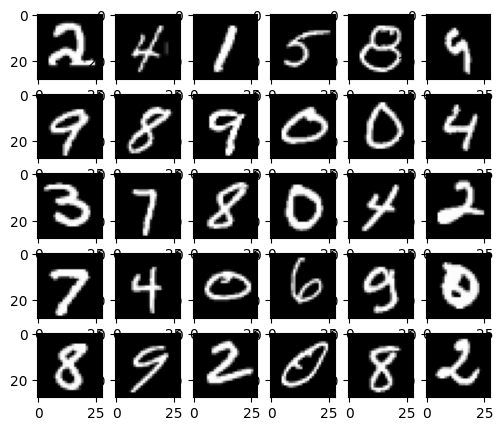

In [3]:
def display_grid(list_conn, num_col):
    num_row = int(list_conn.shape[0]/num_col)

    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col,num_row))
    for i in range(num_col*num_row):
        #ax.set_title("Conn. matrix (log scale), S = "+str(i+1), fontsize=12)
        ax = axes[i%num_row, int(i/num_row)]
        full_im = ax.imshow(list_conn[i].reshape((28,28)), cmap='gray')

    #make room for the colourbar on the right and plot it
    fig.subplots_adjust(right=0.88)
    plt.show()

display_grid(X_mnist[np.random.choice(np.arange(X_mnist.shape[0]), 30)], 6)

In [4]:
def plot_curve1(pts, x_label, y_label, title):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  index = np.arange(1, len(pts)+1, 1)
  plt.plot(index, pts, '-b')

  plt.show()

def calculate_accuracy(y_act, y_pred):
    """Calculate accuracy given actual and predicted labels."""
    y_act = np.asarray(y_act).flatten()
    y_pred = np.asarray(y_pred).flatten()
    return np.sum(y_act == y_pred) / len(y_act)

In [5]:
def stratified_train_test_logistic(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = []
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*6/7)])
        list_test += list(indices[int(len(indices)*6/7) : ])

    X_train_logistic = X[list_train]
    y_train_logistic = y[list_train]

    X_test_logistic = X[list_test]
    y_test_logistic = y[list_test]

    return X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic

X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic = stratified_train_test_logistic(X_mnist, y_mnist, nclasses=10)

In [6]:
print(X_train_logistic.shape, y_train_logistic.shape, X_test_logistic.shape, y_test_logistic.shape)

(59996, 784) (59996,) (10004, 784) (10004,)


### 1. Logistic Regression

In [7]:
def encode(y,val):
    return (y==val)*2 - 1

from sklearn.linear_model import LogisticRegression

for i in range(10):
    clf = LogisticRegression(random_state=42, max_iter=250).fit(X_train_logistic, encode(y_train_logistic,i))
    pred_test = clf.predict(X_test_logistic)

    print(f"Accuracy at {i}: {calculate_accuracy(pred_test ,encode(y_test_logistic,i))}")

Accuracy at 0: 0.991703318672531
Accuracy at 1: 0.9932027189124351
Accuracy at 2: 0.9812075169932027
Accuracy at 3: 0.9750099960015993
Accuracy at 4: 0.9836065573770492
Accuracy at 5: 0.9749100359856058
Accuracy at 6: 0.9875049980007997
Accuracy at 7: 0.9855057976809276
Accuracy at 8: 0.9583166733306677
Accuracy at 9: 0.9634146341463414


### 2. SoftMax Regression

In [8]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# With gradient descent
def loss_softmax(X, W, Y):
    # TO DO: Get the predicted Y_hat for the current W. dim: R^(n×k)
    Y_hat = softmax(X @ W)

    # TO DO: cross-entropy loss L
    L = (-np.sum(Y * np.log(Y_hat)))/ Y.shape[0]
    return L

def gradient_softmax(X, W, Y):
    # TO DO: Vectorized implementation of softmax gradient
    # dim: R^(d×k)
    error = softmax(X @ W) - Y
    grad = (X.T @ error) / Y.shape[0]
    return grad

def learn_params_softmax(X, Y, lr, num_epochs):
    """
    Learn softmax regression parameters using gradient descent.

    X: Feature matrix (n×d)
    Y: One-hot encoded labels (n×k)
    lr: Learning rate
    num_epochs: Number of epochs

    Returns:
    W: Learned weight matrix
    loss: List of loss values over epochs
    """
    # TO DO: Initialize weights
    W = np.zeros((X.shape[1], Y.shape[1]))

    loss = []
    for _ in range(num_epochs):
        # TO DO: Calculate loss and append to loss list
        loss.append(loss_softmax(X, W, Y))
        # TO DO: Gradient update
        W -= lr * gradient_softmax(X, W, Y)

    return W, loss

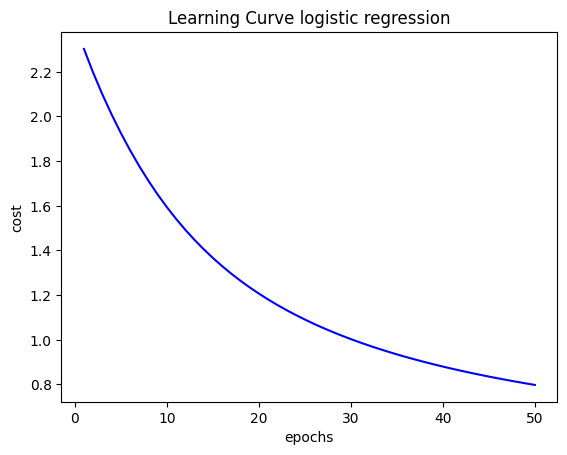

In [9]:
def train_test_softmax(X_train, y_train):
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    Y = np.zeros((y_train.shape[0], len(np.unique(y_train))))
    # TO DO: Assign 1 to the correct class indices
    Y[np.arange(y_train.shape[0]), y_train] = 1
    # TO DO: add 1s to X_train to allow bias in regression
    X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

    epochs = 50
    w, loss = learn_params_softmax(X_train, Y, 0.1, epochs)

    plot_curve1(loss, "epochs", "cost", "Learning Curve logistic regression")
    return w

w = train_test_softmax(X_train_logistic, y_train_logistic)


Accuracy on test set by Logistic (multiclass) regression  0.84
[[9.360e+02 0.000e+00 8.000e+00 6.000e+00 1.000e+00 2.000e+00 1.800e+01
  2.000e+00 1.200e+01 2.000e+00]
 [0.000e+00 1.076e+03 6.000e+00 4.000e+00 0.000e+00 3.000e+00 1.000e+00
  4.000e+00 3.200e+01 0.000e+00]
 [1.300e+01 3.900e+01 7.900e+02 3.200e+01 2.200e+01 1.000e+00 3.600e+01
  1.800e+01 4.100e+01 7.000e+00]
 [5.000e+00 1.600e+01 3.400e+01 8.670e+02 2.000e+00 2.700e+01 8.000e+00
  9.000e+00 3.600e+01 1.700e+01]
 [3.000e+00 1.700e+01 6.000e+00 0.000e+00 8.270e+02 1.000e+00 1.900e+01
  4.000e+00 1.200e+01 8.600e+01]
 [3.200e+01 3.600e+01 1.000e+01 1.190e+02 2.400e+01 5.810e+02 2.800e+01
  2.000e+00 4.900e+01 2.100e+01]
 [1.600e+01 2.100e+01 2.200e+01 1.000e+00 1.300e+01 1.700e+01 8.830e+02
  1.000e+00 9.000e+00 0.000e+00]
 [1.400e+01 3.900e+01 1.900e+01 0.000e+00 1.400e+01 0.000e+00 1.000e+00
  8.950e+02 8.000e+00 5.200e+01]
 [1.000e+01 5.200e+01 9.000e+00 7.900e+01 9.000e+00 2.000e+01 9.000e+00
  5.000e+00 7.550e+02 2.

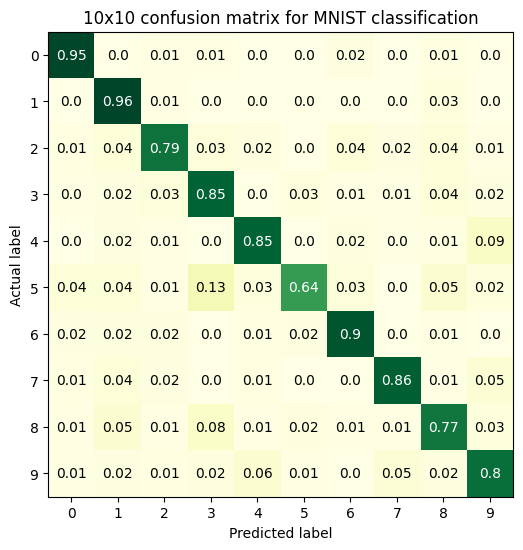

In [10]:

def display_confusion_matrix(y, y_pred, n, title_="10x10 confusion matrix for MNIST classification", labels_ = np.arange(10)):
    confusion_matrix = np.zeros((n, n))
    n_sample_per_class = np.zeros((n, 1))
    for i in range(n):
        n_sample_per_class[i, 0] = np.sum(y == i)
    for i in range(len(y)):#range(y.shape[0]):
        confusion_matrix[y[i], y_pred[i]] += 1

    print (confusion_matrix)

    confusion_matrix = confusion_matrix / n_sample_per_class

    fig, ax = plt.subplots(figsize=(6, 8))
    heatmap = ax.imshow(confusion_matrix, cmap="YlGn")

    ax.set_xticks(np.arange(n), labels=labels_)
    ax.set_yticks(np.arange(n), labels=labels_)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(title_)
    for i in range(n):
        for j in range(n):
            if i == j:
                col = 'w'
            else:
                col = 'k'
            text = ax.text(j, i, np.round(confusion_matrix[i, j], 2), ha="center", va="center", color=col)
    return confusion_matrix

def display_test_results(W, X, y):
    # TO DO: Add 1s to X to allow bias in regression
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    Y = np.zeros((y.shape[0], len(np.unique(y))))
    # TO DO: Assign 1 to the correct class indices
    Y[np.arange(y.shape[0]), y] = 1

    # TO DO: Get the probabilities for each class of the test set (X)
    # TO DO: Decide the predicted class label
    pred_y = X@w
    pred_y = np.argmax(pred_y, axis=1)

    print ()
    print("Accuracy on test set by Logistic (multiclass) regression ", np.round(calculate_accuracy(y.T, pred_y), 2))

    #display the contingency table
    display_confusion_matrix(y.T, pred_y, len(np.unique(y)))



display_test_results(w, X_test_logistic, y_test_logistic)